In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

#### Declaração de variáveis

In [17]:
h = 19
r = 12e-3 #metros
l = 168e-3 #metros
tb = 100
tinf = 25
p = 2*math.pi*r
Ab = math.pi*(r**2)
As = Ab + l*p
k = 240
m=math.sqrt((h*p)/(k*Ab))
thetab = tb-tinf 


#### Cálculo do Tl

In [18]:
def calcula_tl(x):
    tl = ((np.cosh(m*(l-x)) + (h/(m*k))*np.sinh(m*(l-x))) / (np.cosh(m*l) + (h/(m*k)*np.sinh(m*l))))*thetab + tinf
    return tl

#### Gráfico da temperatura por comprimento

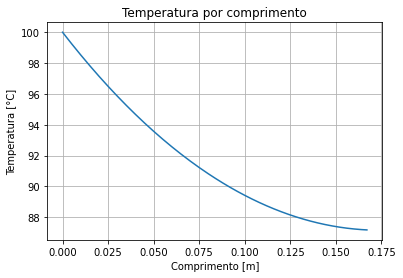

In [19]:
x = np.arange(0,l,1e-3)
tl_list = []
for i in x:
    tl = calcula_tl(i)
    tl_list.append(tl)

plt.title("Temperatura por comprimento")
plt.plot(x, tl_list)
plt.xlabel("Comprimento [m]")
plt.ylabel("Temperatura [°C]")
plt.grid(True)
plt.show()

#### Cálculo da taxa, eficiência e efetividade

In [20]:
M = thetab*math.sqrt(h*p*k*Ab)
def taxa_transferencia(l):
    qa = M*( (np.sinh(m*l) + (h/(m*k)*np.cosh(m*l))) / ((np.cosh(m*l) + (h/(m*k)*np.sinh(m*l)))) )
    return qa

def efetividade(qa):
    e = qa / (h*Ab*thetab)
    return e 

def eficiencia(qa):
    n = qa /(h*As*thetab)
    return n  

In [21]:
taxa = taxa_transferencia(l)
print("Taxa de transferência de calor: {:.3f} W".format(taxa))

Taxa de transferência de calor: 16.548 W


In [22]:
efet = efetividade(taxa)
print("Efetividade: {:.3f}".format(efet))

Efetividade: 25.670


In [23]:
efi = eficiencia(taxa)
print("Eficiência: {:.3f}".format(efi))

Eficiência: 0.885


### Aleta infinita

In [24]:
print("Taxa de transferência de calor da aleta infinita: {:.3} W".format(M))

Taxa de transferência de calor da aleta infinita: 29.6 W


0.8900000000000006


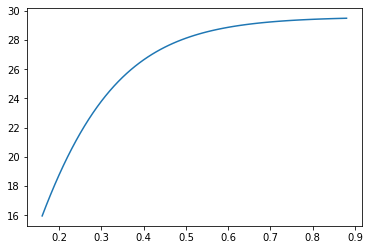

In [25]:
m_chute = 0
l_chute = 0.16
el_chute = []
em_chute = []
while abs(m_chute-M) > 0.1 :
    m_chute = M*( (np.sinh(m*l_chute) + (h/(m*k)*np.cosh(m*l_chute))) / ((np.cosh(m*l_chute) + (h/(m*k)*np.sinh(m*l_chute)))) )
    el_chute.append(l_chute)
    em_chute.append(m_chute)
    l_chute += 0.01
print(l_chute) 

plt.plot(el_chute, em_chute)
plt.show()

In [26]:
q_novo = taxa_transferencia(0.89)

q_novo

29.49080556316696

--- 

In [27]:
h = 19
r = 12e-3 #metros
r3 = 3*r
l = 168e-3 #metros
tb = 100
tinf = 25
p = 2*math.pi*r3
Ab = math.pi*(r3**2)
As = Ab + l*p
k = 240
m=math.sqrt((h*p)/(k*Ab))
thetab = tb-tinf 

In [28]:
M = thetab*math.sqrt(h*p*k*Ab)
def taxa_transferencia3(l):
    qa = M*( (np.sinh(m*l) + (h/(m*k)*np.cosh(m*l))) / ((np.cosh(m*l) + (h/(m*k)*np.sinh(m*l)))) )
    return qa
tripla = taxa_transferencia3(l)
print(tripla)

57.08883328530953


---

In [29]:
h = 19
r = 12e-3 #metros
r3 = 3*r
l = 168e-3 #metros
tb = 100
tinf = 25
p = 2*math.pi*r3
Ab = math.pi*(r3**2)
As = Ab + l*p
k_al = 240
k_cu = 400
m=math.sqrt((h*p)/(k*Ab))
thetab = tb-tinf 

In [30]:
M = thetab*math.sqrt(h*p*k*Ab)
def taxa_transferencia_new(l, k):
    qa = M*( (np.sinh(m*l) + (h/(m*k)*np.cosh(m*l))) / ((np.cosh(m*l) + (h/(m*k)*np.sinh(m*l)))) )
    return qa
tripla = taxa_transferencia_new(l, k_al)
quadra = taxa_transferencia_new(l, k_cu)
print(tripla)
print(quadra)

57.08883328530953
55.075250690474256
